# Kaggle Project

## Day 1


In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())
filename = '/Users/dongjingwen/Desktop/KaggleProject/data-sales/sales_train.csv'

/Users/dongjingwen/Desktop/KaggleProject


### Load data from csv file into pandas dataframe

In [222]:
df_sales_train = pd.read_csv(filename,engine='python')
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [223]:
df_sales_train.shape

(2935849, 6)

## Show outliers on plots

### Create catterplot and label outliers

<ipython-input-111-58d95d5ec0fb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.text(20,1100,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>900][df_sales_train['item_cnt_day']<1500].index[0]]))


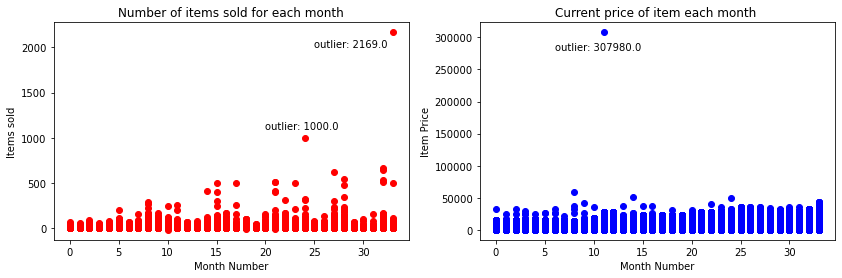

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,4))

ax1.scatter(df_sales_train['date_block_num'],df_sales_train['item_cnt_day'],color='red')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Items sold')
ax1.set_title('Number of items sold for each month')
ax1.text(20,1100,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>900][df_sales_train['item_cnt_day']<1500].index[0]]))
ax1.text(25,2000,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>1800].index[0]]))

ax2.scatter(df_sales_train['date_block_num'],df_sales_train['item_price'],color='blue')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Item Price')
ax2.set_title('Current price of item each month ')
ax2.text(6,280000,'outlier: '+str(df_sales_train['item_price'][df_sales_train[df_sales_train['item_price']>250000].index[0]]))

plt.show()

### Identify outliers on boxplot

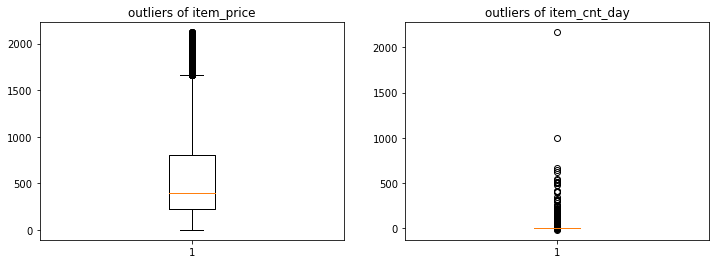

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.boxplot(df_sales_train['item_price'])
ax1.set_title('outliers of item_price')
ax2.boxplot(df_sales_train['item_cnt_day'])
ax2.set_title('outliers of item_cnt_day')
plt.show()

In [224]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    q_range = q3-q1
    lower = q1 - q_range*1.5
    upper = q3 + q_range*1.5
    df_out = df[df[column]>=lower]
    df_out = df[df[column]<=upper]
    return df_out

In [225]:
#df_here=df_sales_train
#df_here=outlier(df_here,'item_price').sort_values(by='item_price')
#df_here=outlier(df_here,'item_cnt_day').sort_values(by='item_cnt_day')

df_sales_train=outlier(df_sales_train,'item_price')
df_sales_train=outlier(df_sales_train,'item_cnt_day')
df_here.shape

## Aggregate sales_train from daily to monthly level

In [227]:
df_monthly=df.groupby(['date_block_num','shop_id','item_id'],as_index=False).agg(
    {'item_price':'mean','item_cnt_day':'sum'}).rename(columns={'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})
df_monthly.sort_values(by=['date_block_num','item_id','shop_id']).head()

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
22182,0,25,19,28.0,1.0
2335,0,1,27,1890.0,1.0
9970,0,10,27,1890.0,1.0
12747,0,15,28,549.0,1.0
33944,0,31,28,549.0,3.0


In [228]:
df_monthly.sort_values(by='item_id')

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
1043647,20,54,0,58.0,1.0
1121665,22,54,2,58.0,1.0
1005010,19,54,2,58.0,1.0
1005011,19,54,3,58.0,1.0
961624,18,54,3,100.0,1.0
...,...,...,...,...,...
4513,0,2,22168,799.0,1.0
103205,1,42,22168,799.0,1.0
159655,2,43,22168,798.5,1.0
10989,0,12,22168,799.0,1.0


# Day 2

### Pirck 10 random items

In [231]:
random_10 = df_monthly[['item_id']].sample(n=10)
random_10

,item_id
1068560,6763
320129,14091
949018,10109
797247,13619
985653,2969
1065619,10887
1453560,18280
110301,12782
316435,4781
927422,21639


In [306]:
df_random_10 = df_monthly[df_monthly['item_id'].isin(random_10['item_id'])].reset_index()
df_random_10 = df_random_10.groupby(by=['item_id','date_block_num'],as_index = False).agg({'avg_item_price':'mean','item_cnt_month':'sum'})

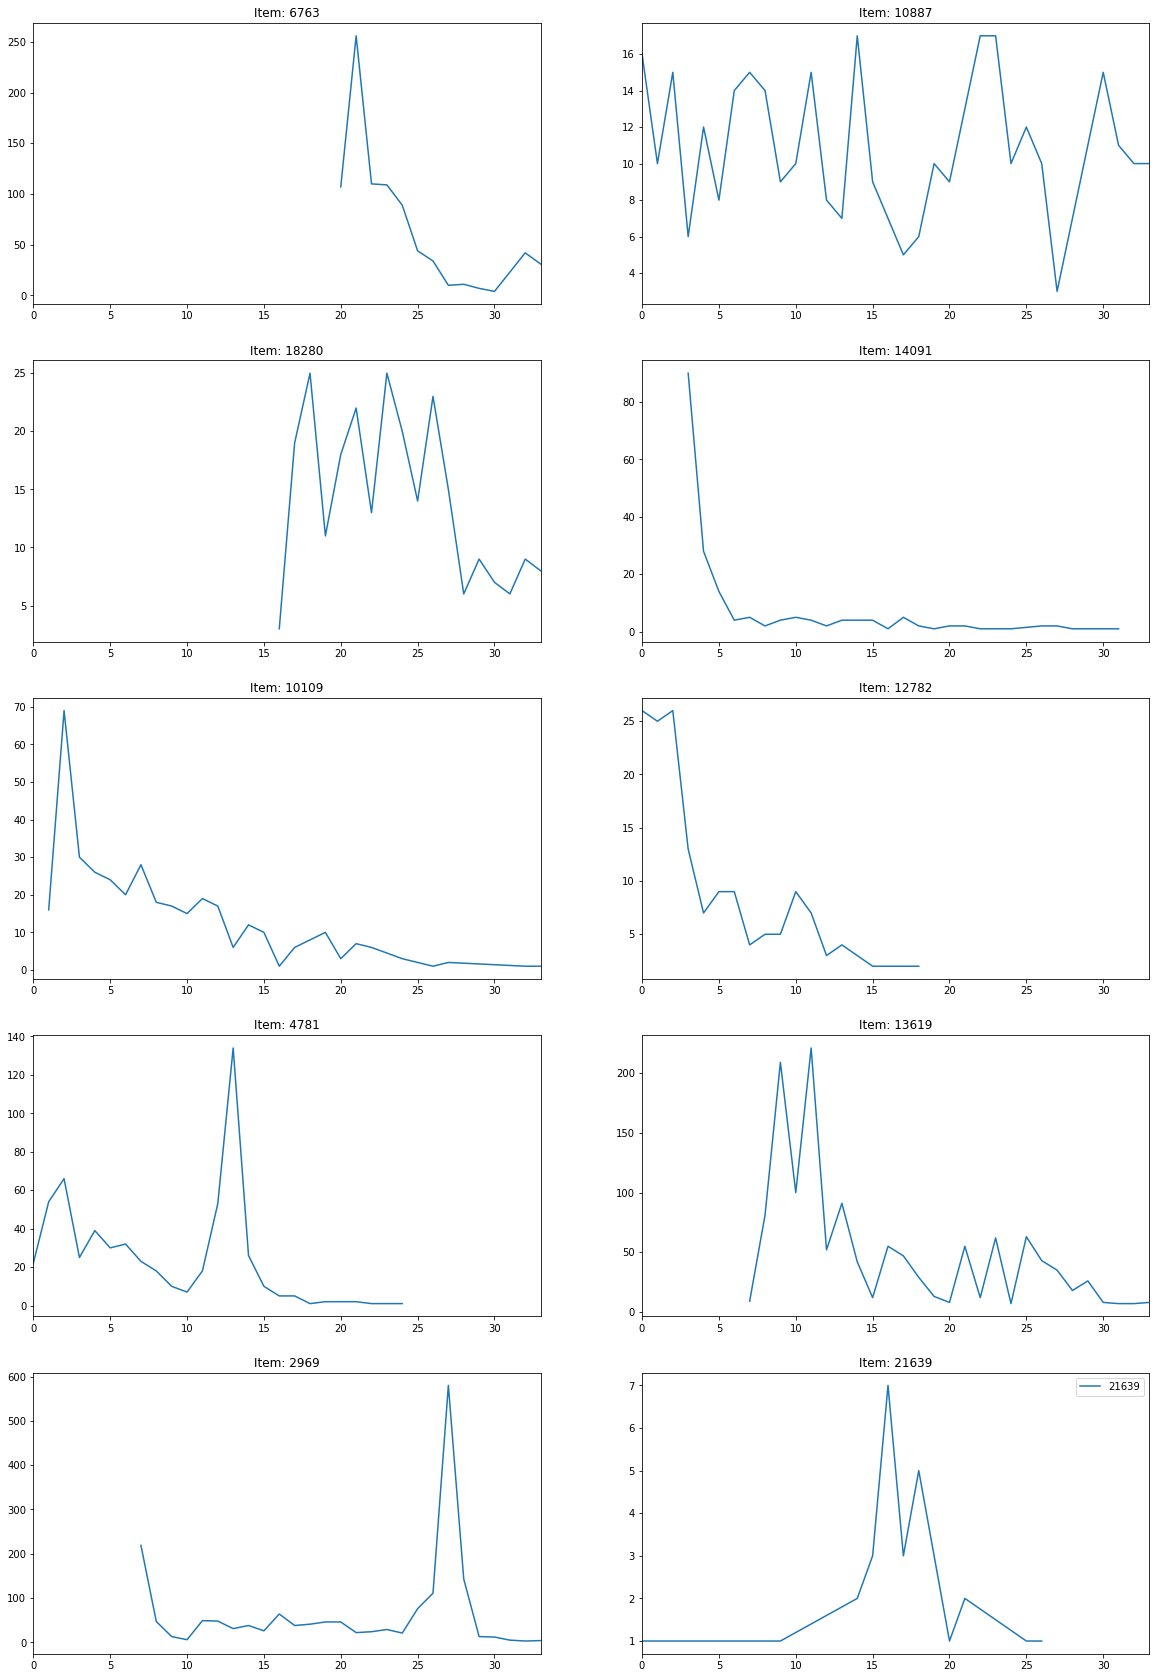

In [308]:
fig, axs = plt.subplots(5,2, figsize=(20,30))

for i,item_id in enumerate(random_10['item_id'].unique()):
    item = df_random_10[df_random_10['item_id']==item_id]
    axs[i%5,i%2].plot(item['date_block_num'],item['item_cnt_month'],label=item_id)
    axs[i%5,i%2].set_xlim([0,33])
    axs[i%5,i%2].set_title('Item: '+str(item_id))
plt.legend()
plt.show()


### Reformat

In [331]:
df_monthly_reformat = pd.pivot_table(df_monthly, values=('item_cnt_month'),index=['shop_id','item_id'],columns = 'date_block_num').reset_index()
df_monthly_reformat = df_monthly_reformat.fillna(0)
df_monthly_reformat = df_monthly_reformat.rename_axis(None,axis=1)
df_monthly_reformat = df_monthly_reformat.sort_values(by=['item_id','shop_id']).reset_index()

In [344]:
df_monthly_train = df_monthly_reformat.groupby('item_id',as_index= False).sum()
df_monthly_train.drop(columns = ['shop_id'],inplace = True)
tmp2 = df_monthly_train
tmp2

,item_id,index,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,348013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,348014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,348015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,348016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,348017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,22164,9540781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,289.0,92.0,27.0,23.0,6.0,12.0,20.0,9.0,15.0
20808,22165,363118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20809,22166,363119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,12.0,4.0,8.0,10.0,8.0,11.0,5.0,11.0
20810,22167,9937124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,46.0,40.0,38.0,31.0,33.0,34.0,29.0,21.0,37.0


### Linear Regression Model

In [333]:
X = df_monthly_reformat.drop(columns = ['item_id','shop_id',33])
y = df_monthly_reformat[33].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()




In [334]:
LRmodel.fit(X_train,y_train)

LinearRegression()

In [335]:
LRmodel.score(X_test,y_test)

-0.8206152836314002

In [345]:
y_pred = model.predict(X_test)
y_pred

array([-0.21593094,  0.95271055,  0.30419325, ...,  0.25210774,
        9.25800295,  0.79706528])

# Day 3

## Feature Engineering

### Shop


In [491]:
df_shop = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/shops.csv')
df_shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


City & dummy encoding

In [492]:
df_shop['city'] = df_shop['shop_name'].str.split().str[0]
df_shop['city_Label'] = df_shop['city'].astype('category').cat.codes
df_shop.head()

,shop_name,shop_id,city,city_Label
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3


In [493]:
#def in_op_type()
df_shop['op_type']="Null"
op_list = ['мтрц','трц','трк','тц','тк']
for item in op_list:
    df_shop.loc[df_shop['shop_name'].str.contains(item.upper()),'op_type'] = item.upper()
df_shop['op_type_Label'] = df_shop['op_type'].astype('category').cat.codes
df_shop.head()

,shop_name,shop_id,city,city_Label,op_type,op_type_Label
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0,Null,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0,ТЦ,4
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1,ТЦ,4
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2,ТРК,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3,ТЦ,4


### Item

In [556]:
df_item = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/items.csv')
df_item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Item Name & Dummy Encoding

In [559]:
df_item['name_s1'] = 0
df_item['name_s2'] = 0
df_item['name_s3'] = 0

In [560]:
# separate name 1 & 3
split_13_result = df_item['item_name'].str.split('(').str
df_item.loc[split_13_result.len()==2,'name_s1'] = split_13_result[0]
df_item.loc[split_13_result.len()==2,'name_s3'] = split_13_result[1]

# separate name 1 & 2
split_12_result = df_item['item_name'].str.split('[').str
df_item.loc[split_12_result.len()==2,'name_s1'] = split_12_result[0]
df_item.loc[split_12_result.len()==2,'name_s2'] = split_12_result[1]

# dummy encoding
df_item['name_s1_label'] = df_item['name_s1'].astype('category').cat.codes
df_item['name_s2_label'] = df_item['name_s2'].astype('category').cat.codes
df_item['name_s3_label'] = df_item['name_s3'].astype('category').cat.codes

df_item.head()

,item_name,item_id,item_category_id,name_s1,name_s2,name_s3,name_s1_label,name_s2_label,name_s3_label
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,ПЛАСТ.) D,1,0,937
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,!ABBYY FineReader 12 Professional Edition Full,"PC, Цифровая версия]",0,2,58,0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,***В ЛУЧАХ СЛАВЫ,0,UNV) D,3,0,762
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,***ГОЛУБАЯ ВОЛНА,0,Univ) D,4,0,764
4,***КОРОБКА (СТЕКЛО) D,4,40,***КОРОБКА,0,СТЕКЛО) D,5,0,988


### Item Category

In [351]:
df_item_category = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/item_categories.csv')
df_item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Item Category Name & Dummy Encoding

In [563]:
df_item_category['type']= df_item_category['item_category_name']
df_item_category['subtype'] = df_item_category['item_category_name']

type_split = df_item_category['item_category_name'].str.split('-').str
df_item_category.loc[type_split.len()==2,'type']=type_split[0]
df_item_category.loc[type_split.len()==2,'subtype']=type_split[1]


In [566]:
df_item_category.head()

,item_category_name,item_category_id,type,subtype
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP


In [567]:

df_item_category['type_label'] = df_item_category['type'].astype('category').cat.codes
df_item_category['subtype_label'] = df_item_category['subtype'].astype('category').cat.codes
df_item_category.head()

,item_category_name,item_category_id,type,subtype,type_label,subtype_label
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники,0,27
1,Аксессуары - PS2,1,Аксессуары,PS2,1,8
2,Аксессуары - PS3,2,Аксессуары,PS3,1,9
3,Аксессуары - PS4,3,Аксессуары,PS4,1,10
4,Аксессуары - PSP,4,Аксессуары,PSP,1,12
